# Data Summary


Paper: https://ai.nejm.org/doi/10.1056/AIdbp2400732

medArxiv w/ data link: https://www.medrxiv.org/content/10.1101/2024.06.27.24309562v1 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path


# Set paths
data_dir = Path("../data")
excel_file = data_dir / "release_midas.xlsx"
df = pd.read_excel(excel_file) 
# remove first column
df = df.iloc[:, 1:]
df['midas_record_id'] = df['midas_record_id'].astype(str)


In [2]:
print(f"\n=== BACKGROUND ===")
print(f"• MRA-MIDAS: First publicly available paired dermoscopic + clinical image dataset")
print(f"• {len(df)} image records from Stanford Medicine (Aug 2020 - Apr 2023)")
print(f"• Images taken with iPhone/iPad (15cm, 30cm, dermoscope) - no flash photography")
print(f"• All lesions medically indicated for biopsy (not retrospective curation)")
print(f"• Control lesions: benign contralateral sites (not biopsied)")
print(f"• Clinical impressions: Top 5 ranked diagnoses by experienced dermatologists")
print(f"• Histopathology: Confirmed by 3 board-certified dermatopathologists")
print(f"• Patient consent: Public release approved (Stanford IRB#36050)")
print(f"• Lesion dimensions: Measured in millimeters at time of evaluation")



=== BACKGROUND ===
• MRA-MIDAS: First publicly available paired dermoscopic + clinical image dataset
• 3416 image records from Stanford Medicine (Aug 2020 - Apr 2023)
• Images taken with iPhone/iPad (15cm, 30cm, dermoscope) - no flash photography
• All lesions medically indicated for biopsy (not retrospective curation)
• Control lesions: benign contralateral sites (not biopsied)
• Clinical impressions: Top 5 ranked diagnoses by experienced dermatologists
• Histopathology: Confirmed by 3 board-certified dermatopathologists
• Patient consent: Public release approved (Stanford IRB#36050)
• Lesion dimensions: Measured in millimeters at time of evaluation


## Clinical Spreadsheet Summary


In [3]:
# Create comprehensive column summary DataFrame
column_meanings = {
    "midas_record_id": "Unique patient record identifier",
    "midas_file_name": "Image filename (clinical/dermoscopic photos taken with iPhone/iPad)",
    "midas_iscontrol": "Control lesion indicator (benign contralateral lesions, not biopsied)",
    "midas_distance": "Camera distance from lesion (15cm, 30cm, dermoscope)",
    "midas_location": "Anatomic location of the lesion (chest, back, etc.)",
    "midas_path": "Histopathologic diagnosis category (confirmed by board-certified dermatopathologists)",
    "midas_pathreport": "Detailed histopathologic report text",
    "midas_gender": "Sex assigned at birth (male/female)",
    "midas_age": "Patient age in years at enrollment",
    "midas_fitzpatrick": "Fitzpatrick skin type (I-VI scale)",
    "midas_melanoma": "Personal history of melanoma (yes/no)",
    "midas_ethnicity": "Patient ethnicity (hispanic/non-hispanic)",
    "midas_race": "Patient race (white, asian, african american, etc.)",
    "clinical_impression_1": "Top-ranked clinical impression (dermatologist's #1 diagnosis)",
    "clinical_impression_2": "Second-ranked clinical impression (dermatologist's #2 diagnosis)", 
    "clinical_impression_3": "Third-ranked clinical impression (dermatologist's #3 diagnosis)",
    "length_(mm)": "Lesion length measured in millimeters",
    "width_(mm)": "Lesion width measured in millimeters"
}

# Create summary data
summary_data = []
for col in df.columns:
    if col in column_meanings:
        definition = column_meanings[col]
    else:
        definition = "Unknown column"
    
    if df[col].dtype in ['int64', 'float64']:
        # Continuous variable
        mean_val = df[col].mean()
        std_val = df[col].std()
        stats = f"{mean_val:.2f} ± {std_val:.2f}"
        examples = f"Range: {df[col].min():.1f} to {df[col].max():.1f}"
    else:
        # Categorical variable
        unique_count = df[col].nunique()
        stats = f"{unique_count} unique values"
        unique_values = df[col].unique()
        if unique_count <= 5:
            examples = ", ".join([str(x) for x in unique_values])
        else:
            examples = ", ".join([str(x) for x in unique_values[:5]]) + "..."
    
    summary_data.append({
        'Column': col,
        'Definition': definition,
        'Statistics': stats,
        'Examples': examples
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df

,Column,Definition,Statistics,Examples
0,midas_record_id,Unique patient record identifier,733 unique values,"1, 2, 3, 4, 5..."
1,midas_file_name,Image filename (clinical/dermoscopic photos ta...,3416 unique values,"s-prd-398966407.jpg, s-prd-398966642.jpg, s-pr..."
2,midas_iscontrol,Control lesion indicator (benign contralateral...,2 unique values,"no, yes"
3,midas_distance,"Camera distance from lesion (15cm, 30cm, dermo...",4 unique values,"1ft, 6in, dscope, n/a - virtual"
4,midas_location,"Anatomic location of the lesion (chest, back, ...",497 unique values,"chest, l lower back, left upper buttock, right..."
5,midas_path,Histopathologic diagnosis category (confirmed ...,16 unique values,"malignant- sccis, benign-melanocytic nevus, be..."
6,midas_pathreport,Detailed histopathologic report text,521 unique values,"focal squamous cell carcinoma, in situ, aris..."
7,midas_gender,Sex assigned at birth (male/female),2 unique values,"female, male"
8,midas_age,Patient age in years at enrollment,63.02 ± 16.29,Range: 21.0 to 99.0
9,midas_fitzpatrick,Fitzpatrick skin type (I-VI scale),6 unique values,"ii fair skin, blue eyes, i pale white skin, bl..."


## Image Info


In [4]:
from PIL import Image

# Find all files and count extensions (case sensitive)
all_files = list(data_dir.glob("*"))
file_extensions = [f.suffix for f in all_files if f.is_file()]

# Count extensions
extension_counts = {}
for ext in file_extensions:
    extension_counts[ext] = extension_counts.get(ext, 0) + 1

print(f"Total files: {len(all_files)}")
print(f"File extensions: {dict(extension_counts)}")

# Filter for image files only (case sensitive)
image_files = [f for f in all_files if f.suffix in ['.jpg', '.jpeg', '.JPG', '.JPEG', '.png', '.PNG']]
print(f"Image files: {len(image_files)}")


Total files: 3412
File extensions: {'.jpg': 3377, '.jpeg': 26, '.JPG': 6, '.xlsx': 1, '.ini': 1}
Image files: 3409


Total 3409 images.

=== IMAGE DIMENSIONS SUMMARY ===
Width range: 292 - 5184 pixels
Height range: 240 - 4096 pixels
Average dimensions: 2883 × 3588

=== FILE SIZE ANALYSIS ===
File size range: 0.01 - 3.30 MB
Average file size: 1.06 MB

=== COLOR MODE DISTRIBUTION ===
  RGB: 3409 images


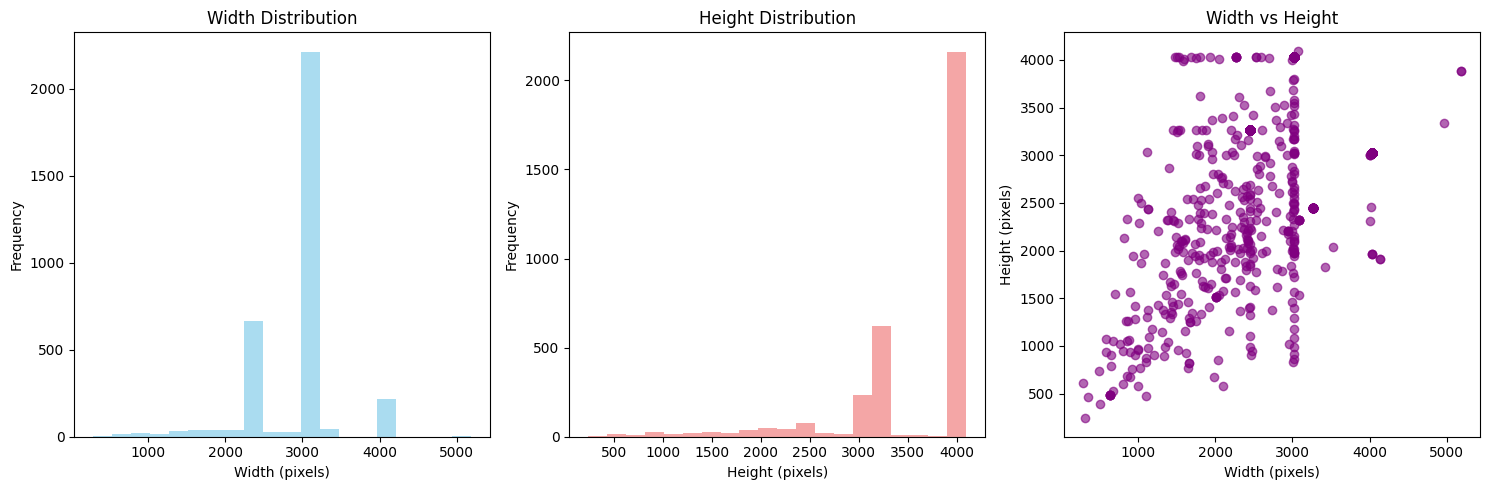

In [5]:

# Get all image files
image_extensions = ['*.jpg', '*.jpeg', '*.JPG', '*.JPEG']
image_files = []
for ext in image_extensions:
    image_files.extend(data_dir.glob(ext))

# Sample a subset of images for detailed analysis (to avoid long processing time)
sample_size = len(image_files)
sample_images = np.random.choice(image_files, sample_size, replace=False)
image_properties = []
print(f"Total {sample_size} images.")

for i, img_path in enumerate(sample_images):
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            mode = img.mode
            format_name = img.format
            
            image_properties.append({
                'filename': img_path.name,
                'width': width,
                'height': height,
                'mode': mode,
                'format': format_name,
                'aspect_ratio': width / height,
                'total_pixels': width * height,
                'file_size_mb': img_path.stat().st_size / (1024 * 1024)
            })
    except Exception as e:
        print(f"Error processing {img_path.name}: {e}")

# Convert to DataFrame for analysis
img_df = pd.DataFrame(image_properties)

if len(img_df) > 0:
    print(f"\n=== IMAGE DIMENSIONS SUMMARY ===")
    print(f"Width range: {img_df['width'].min()} - {img_df['width'].max()} pixels")
    print(f"Height range: {img_df['height'].min()} - {img_df['height'].max()} pixels")
    print(f"Average dimensions: {img_df['width'].mean():.0f} × {img_df['height'].mean():.0f}")
    
    print(f"\n=== FILE SIZE ANALYSIS ===")
    print(f"File size range: {img_df['file_size_mb'].min():.2f} - {img_df['file_size_mb'].max():.2f} MB")
    print(f"Average file size: {img_df['file_size_mb'].mean():.2f} MB")
    
    print(f"\n=== COLOR MODE DISTRIBUTION ===")
    mode_counts = img_df['mode'].value_counts()
    for mode, count in mode_counts.items():
        print(f"  {mode}: {count} images")
        
else:
    print("No images could be analyzed")

import matplotlib.pyplot as plt

# Simple image visualizations
if len(img_df) > 0:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Width histogram
    axes[0].hist(img_df['width'], bins=20, alpha=0.7, color='skyblue')
    axes[0].set_title('Width Distribution')
    axes[0].set_xlabel('Width (pixels)')
    axes[0].set_ylabel('Frequency')
    
    # Height histogram
    axes[1].hist(img_df['height'], bins=20, alpha=0.7, color='lightcoral')
    axes[1].set_title('Height Distribution')
    axes[1].set_xlabel('Height (pixels)')
    axes[1].set_ylabel('Frequency')
    
    # Width vs Height scatter plot
    axes[2].scatter(img_df['width'], img_df['height'], alpha=0.6, color='purple')
    axes[2].set_title('Width vs Height')
    axes[2].set_xlabel('Width (pixels)')
    axes[2].set_ylabel('Height (pixels)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No image data available for visualization")

## Image + Clinical Examples (uncomfortable warning)

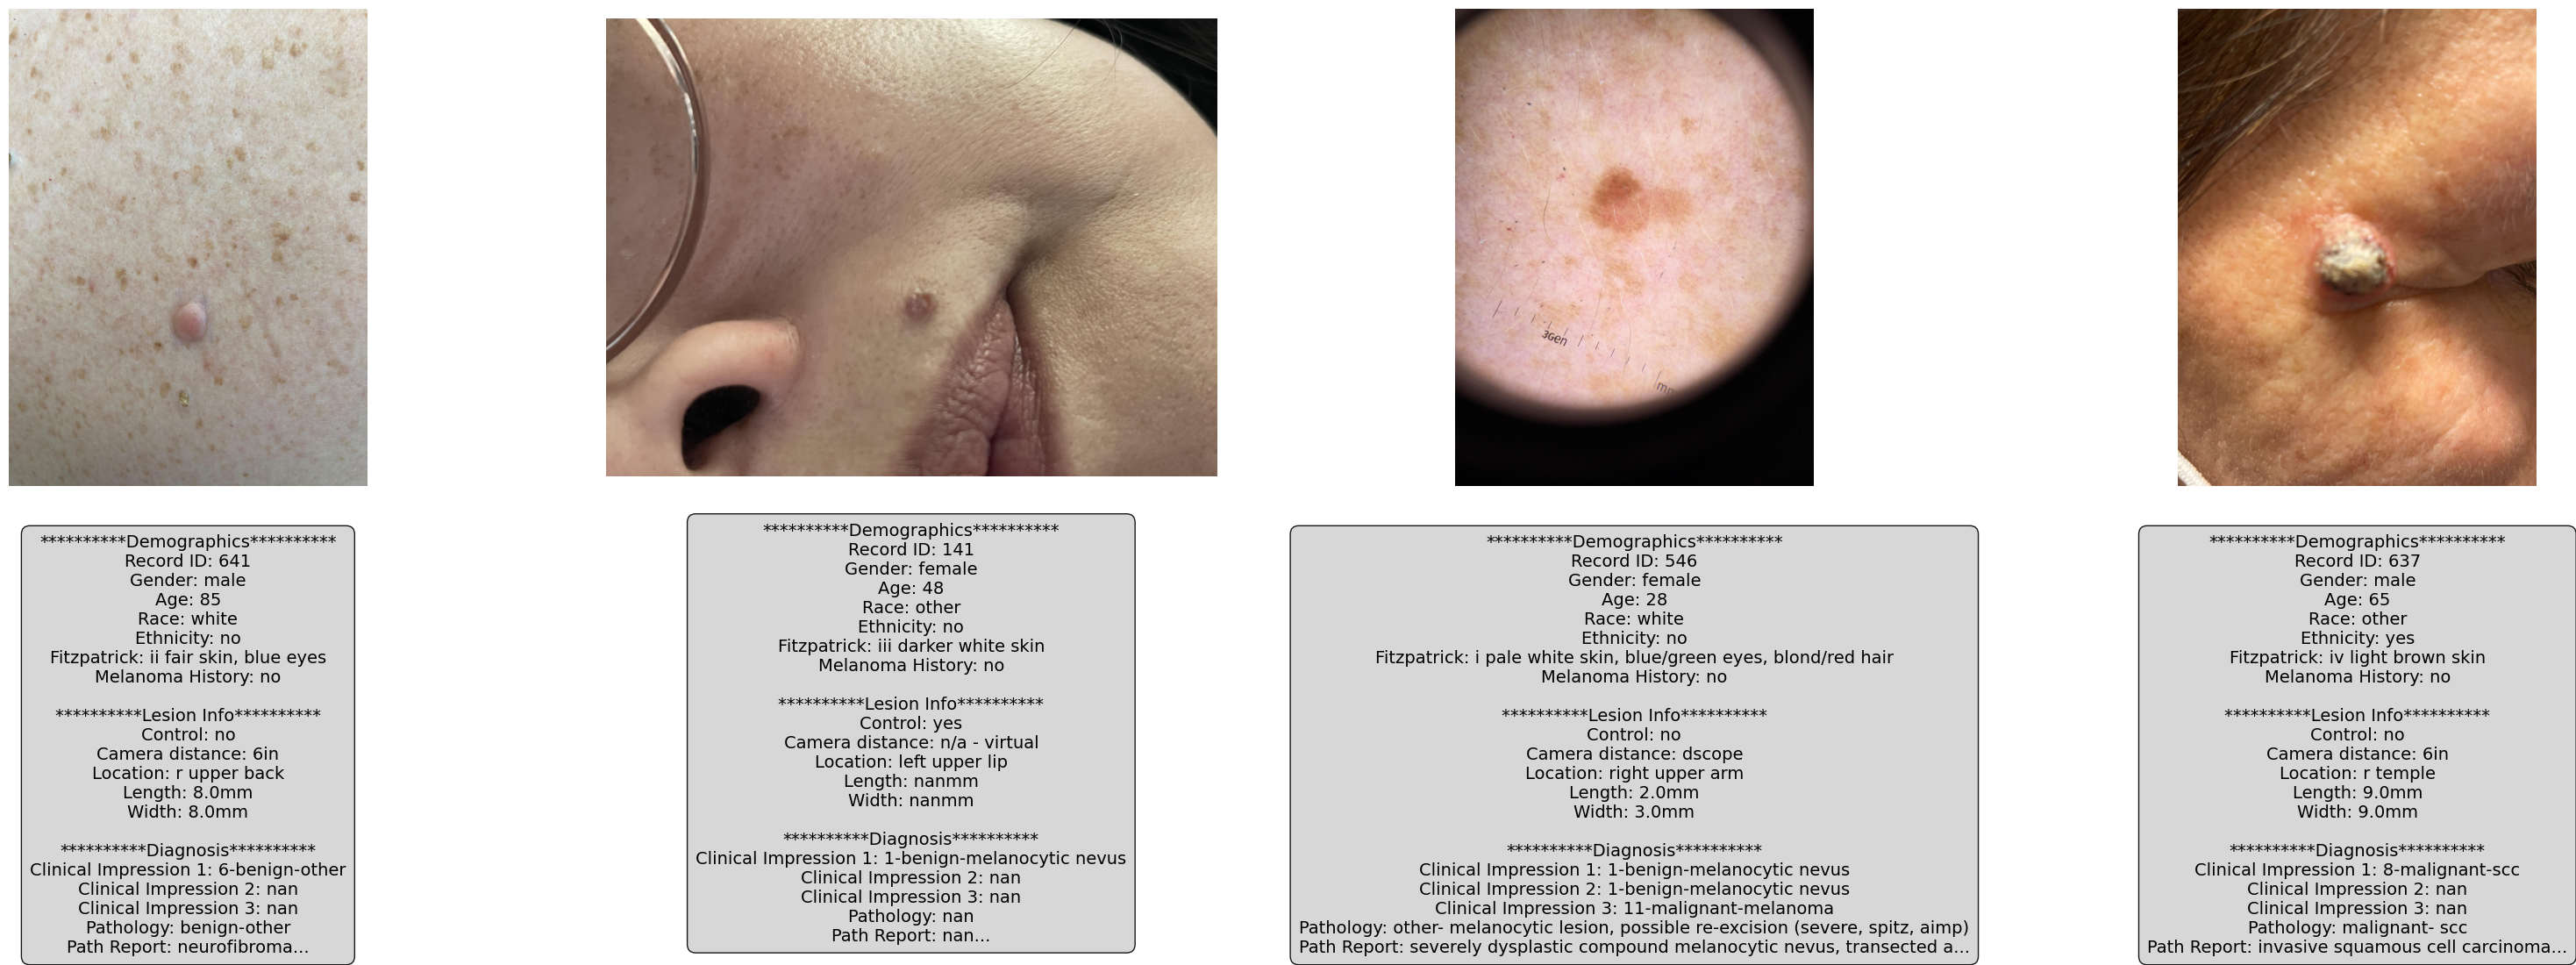

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Get 4 random samples
random_indices = random.sample(range(len(df)), 4)
sample_data = df.iloc[random_indices]

# Create figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(32, 14))

for i, (idx, row) in enumerate(sample_data.iterrows()):
    # Try to find the image file with different extensions
    img_path = None
    filename = row['midas_file_name']
    
    # Try different extensions
    for ext in ['.jpg', '.jpeg', '.JPG', '.JPEG']:
        test_path = data_dir / (filename.split('.')[0] + ext)
        if test_path.exists():
            img_path = test_path
            break
    
    try:
        if img_path and img_path.exists():
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
        else:
            raise FileNotFoundError(f"Image not found: {filename}")
        
        # Organize ALL columns into categories
        demo_info = f"Record ID: {row['midas_record_id']}\n"
        demo_info += f"Gender: {row['midas_gender']}\n"
        demo_info += f"Age: {row['midas_age']}\n"
        demo_info += f"Race: {row['midas_race']}\n"
        demo_info += f"Ethnicity: {row['midas_ethnicity']}\n"
        demo_info += f"Fitzpatrick: {row['midas_fitzpatrick']}\n"
        demo_info += f"Melanoma History: {row['midas_melanoma']}"
        
        image_info = f"Control: {row['midas_iscontrol']}\n"
        image_info += f"Camera distance: {row['midas_distance']}\n"
        image_info += f"Location: {row['midas_location']}\n"
        image_info += f"Length: {row['length_(mm)']}mm\n"
        image_info += f"Width: {row['width_(mm)']}mm"
        
        diagnosis_info = f"Clinical Impression 1: {row['clinical_impression_1']}\n"
        diagnosis_info += f"Clinical Impression 2: {row['clinical_impression_2']}\n"
        diagnosis_info += f"Clinical Impression 3: {row['clinical_impression_3']}\n"
        diagnosis_info += f"Pathology: {row['midas_path']}\n"
        diagnosis_info += f"Path Report: {str(row['midas_pathreport'])[:60]}..."
        
        # Combine all info with bold headers
        clinical_info = f"**********Demographics**********\n{demo_info}\n\n"
        clinical_info += f"**********Lesion Info**********\n{image_info}\n\n"
        clinical_info += f"**********Diagnosis**********\n{diagnosis_info}"
        
        # Add text below image with larger font
        axes[i].text(0.5, -0.1, clinical_info, transform=axes[i].transAxes, 
                    ha='center', va='top', fontsize=14, 
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.9))
        
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error loading\n{filename}\n{str(e)}", 
                    ha='center', va='center', transform=axes[i].transAxes, fontsize=10)
        axes[i].axis('off')

plt.tight_layout()
plt.subplots_adjust(bottom=0.6)  # Even more space for all columns
plt.show()